In [30]:
!pip install tensorflow scikit-learn matplotlib

In [51]:
pip install "numpy<2"


Note: you may need to restart the kernel to use updated packages.


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [61]:
lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.4, color=True)  

In [34]:
X = lfw_people.images
y = lfw_people.target
target_names = lfw_people.target_names


In [35]:
print("Dataset shape:", X.shape)
print("Number of classes (people):", len(target_names))

Dataset shape: (1560, 50, 37, 3)
Number of classes (people): 12


In [36]:
X = X / 255.0
# Ensure 3 channels (ResNet needs RGB)
if X.shape[-1] == 1:
    X = np.repeat(X, 3, axis=-1)


In [37]:
y_cat = to_categorical(y)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.2, random_state=42
)


In [39]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

In [40]:
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(X.shape[1], X.shape[2], 3))


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 90s 1us/step


In [41]:
for layer in base_model.layers:
    layer.trainable = False

In [42]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(target_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2, 2, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │           3,084 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,115,340 (91.99 MB)

 Trainable params: 527,628 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [43]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=10,
    verbose=1
)


Epoch 1/10


C:\Users\admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 17s 248ms/step - accuracy: 0.2965 - loss: 2.2941 - val_accuracy: 0.3429 - val_loss: 2.0950
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - accuracy: 0.3413 - loss: 2.2008 - val_accuracy: 0.3429 - val_loss: 2.0836
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 168ms/step - accuracy: 0.3373 - loss: 2.2006 - val_accuracy: 0.3429 - val_loss: 2.0868
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - accuracy: 0.3413 - loss: 2.1877 - val_accuracy: 0.3429 - val_loss: 2.1108
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - accuracy: 0.3381 - loss: 2.1820 - val_accuracy: 0.3429 - val_loss: 2.0873
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - accuracy: 0.3389 - loss: 2.1819 - val_accuracy: 0.3429 - val_loss: 2.1107
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - accuracy: 0.3389 - loss: 2.1809 - val_accuracy: 0.3429 - val_loss: 2.1126
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 177ms/step - accuracy: 0.3389 - loss: 2.1760 - val_accuracy: 0.3429 - val

In [44]:

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Transfer Learning Test Accuracy: {acc:.2f}")

✅ Transfer Learning Test Accuracy: 0.34


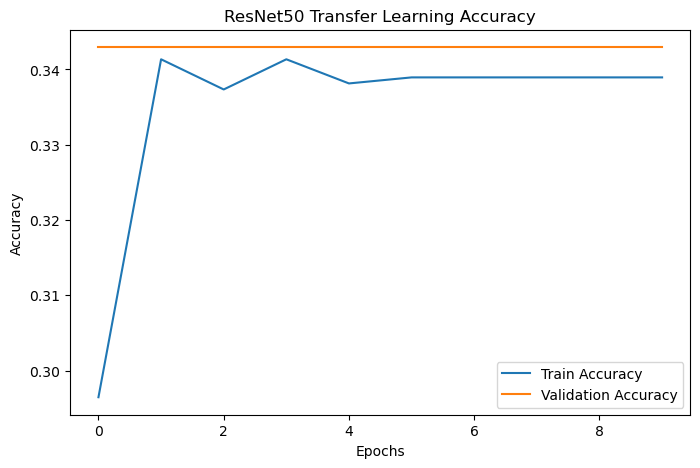

In [45]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("ResNet50 Transfer Learning Accuracy")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


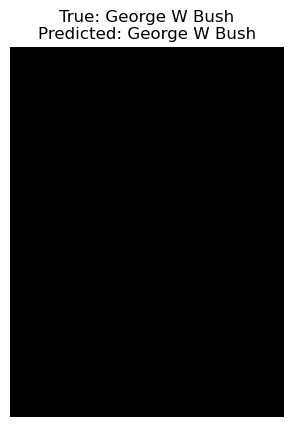

In [46]:
sample_idx = 5
sample_image = X_test[sample_idx].reshape(1, X.shape[1], X.shape[2], 3)

prediction = model.predict(sample_image)
predicted_class = np.argmax(prediction)
true_class = np.argmax(y_test[sample_idx])

plt.imshow(X_test[sample_idx])
plt.title(f"True: {target_names[true_class]}\nPredicted: {target_names[predicted_class]}")
plt.axis("off")
plt.show()

In [ ]:

model.save("human_identifier_resnet50.h5")


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("human_identifier_resnet50.h5")


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(img_path, target_size=(X.shape[1], X.shape[2])):
    # Load image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # add batch dimension
    img_array = img_array / 255.0  # normalize
    return img_array


In [ ]:
img_path = "test_face.jpg"  #image file
img_array = preprocess_image(img_path)

In [ ]:
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
predicted_person = target_names[predicted_class]

In [ ]:

print("Predicted Person:", predicted_person)


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image.load_img(img_path))
plt.title(f"Predicted: {predicted_person}")
plt.axis("off")
plt.show()

In [ ]:
import cv2

cap = cv2.VideoCapture(0)  # open webcam

while True:
    ret, frame = cap.read()
    if not ret:
        break
    

In [ ]:
 resized = cv2.resize(frame, (X.shape[1], X.shape[2]))
    img_array = np.expand_dims(resized, axis=0) / 255.0
    
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    predicted_person = target_names[predicted_class]

In [ ]:
 cv2.putText(frame, f"Pred: {predicted_person}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2, cv2.LINE_AA)
    cv2.imshow("Webcam Face Recognition", frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()